# 0. Intodução

A análise abaixo foi feita utilizando dados do RH da IBM que foram disponibilizados no site www.kaggle.com.

Nossa motivação é entender o perfil das pessoas que deixam a empresa. Isso pode ser importante para prevenir demissões, diminuir custos
operacionais e melhorar a satisfação dos empregados, o que, consequentemente, deve aumentar a produtividade da empresa.

Perguntas que tentaremos responder com a análise:
- Exites alguma disparidade salarial entre homens e mulheres?
- Há alguma evidência de que gênero tenha impacto no atrito entre o funcionario e empresa?
- Qual é a relação entre o sálario e departamento em que o funcionario atua?
.
.
- ...

In [ ]:
Fontes do dataset:

<b><i> Nota: Forma de pensar na analise -> Analisar o dataset (estrutura) analisar os tipos de dados, como ele é, formato e conteudo -> Analise Univariada (analisar variaveis importantes) -> Analise Bivariada ou Multivariada (analisar a relação entre 2 ou mais variaveis) -> Machine Learnig</i></b>

# 1. Carregando Bibliotecas

In [11]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# 2. Carregando Dataset

In [4]:
rh = pd.read_csv('HR Employee Attrition.csv')
rh.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
rh.shape

(1470, 35)

In [8]:
rh.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# 3. Análise Univariada

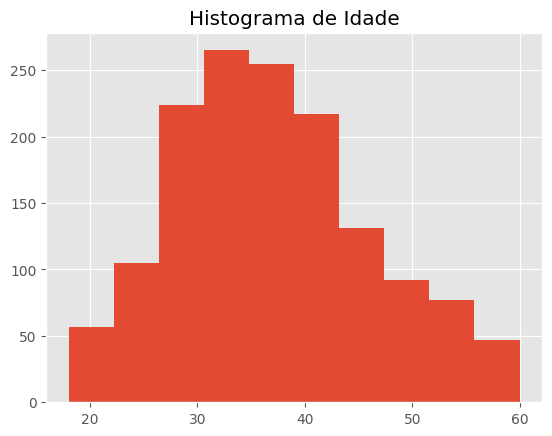

In [14]:
_ = plt.hist(rh.Age)
_ = plt.title('Histograma de Idade')

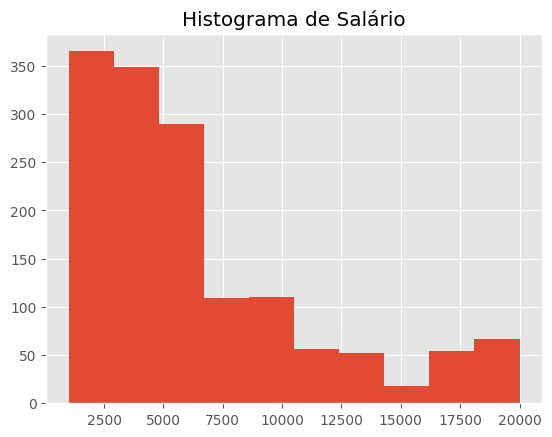

In [15]:
_ = plt.hist(rh.MonthlyIncome)
_ = plt.title('Histograma de Salário')

In [17]:
rh.Gender.value_counts(normalize=True)

Gender
Male      0.6
Female    0.4
Name: proportion, dtype: float64

In [18]:
rh.EducationField.value_counts(1)

EducationField
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: proportion, dtype: float64

Text(0.5, 1.0, 'HeadCount por Campo Educacinal')

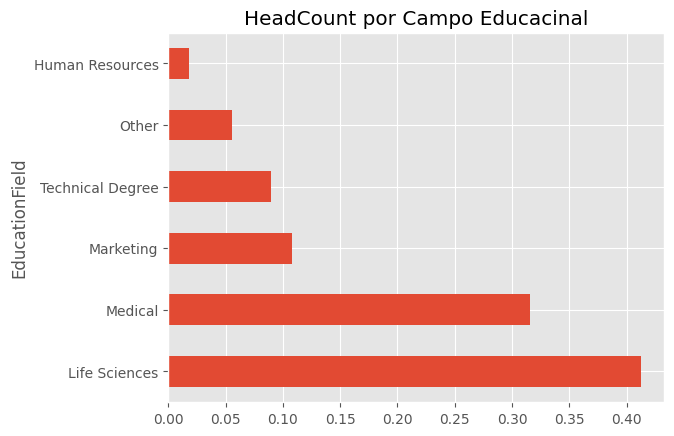

In [24]:
rh.EducationField.value_counts(1).plot.barh();
plt.title('HeadCount por Campo Educacinal')

Analisando o gráfico acima, nota-se que o a maioria dos funcionarios possuem formação na área de Life Sciences, em seguida vem as áreas de
Medical e Marketing. Em ultimo vem a formação de Human Resources.

# 4. Analise Bivariada

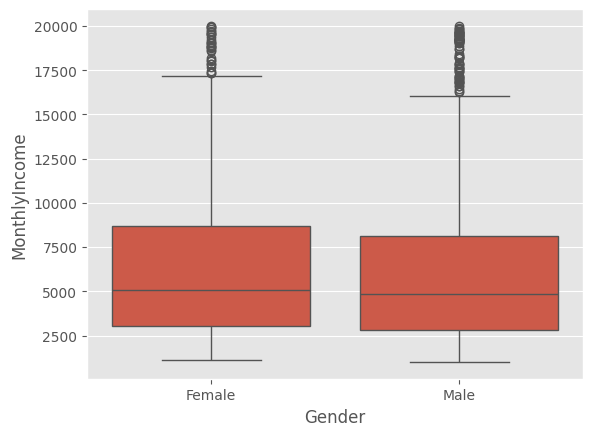

In [28]:
sns.boxplot(x='Gender', y='MonthlyIncome', data=rh);

Analisando o gráfico acima, nota-se que, a distribuição salarial entre genêros é muito parecida na IBM. Normalmente, espera-se encontra salários 
mais alto para homens, porém na IBM não ocorre gender map.

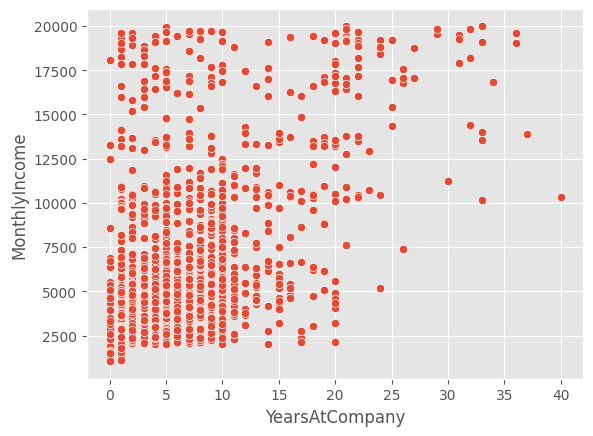

In [29]:
sns.scatterplot(x='YearsAtCompany', y='MonthlyIncome', data=rh);

# 5. Analise Multivariada

In [32]:
rh.corr

<bound method DataFrame.corr of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Education